# Punic Plots:
Do diverse new plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

from hapsburg.figures.plot_bars import plot_panel_row, prepare_dfs_plot

### Hack for Basemaps
import mpl_toolkits
mpl_toolkits.__path__.append(
    '/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label
from hapsburg.figures.plot_individual_roh import plot_pde_individual, plot_roh_individual
from hapsburg.figures.plot_posterior import plot_posterior_cm

compute-e-16-233.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer
CPU Count: 28


In [2]:
df1 = pd.read_csv("/n/groups/reich/hringbauer/hapsburg_runs/output/combined_roh05.v49.2.tsv", sep='\t')
df1 = df1.sort_values(by="sum_roh>20", ascending=False)
print(f"Loaded {len(df1)} Individuals with ROH")

Loaded 16201 Individuals with ROH


# Spain Punic

In [3]:
df_p = df1[df1["clst"].str.contains("Punic|Phoen")]
df_p["clst"].value_counts()

Italy_Sicily_Punic                               20
Tunisia_Punic                                    15
Spain_Punic                                      10
Italy_Sardinia_Punic                              7
Tunisia_Punic_Africa                              6
Israel_Phoenician                                 4
Italy_Sicily_Punic_Roman                          4
Tunisia_Punic_oAfricaHigh                         3
Spain_Punic_Hypogeum                              3
Italy_Sardinia_IA_Punic_2                         2
Italy_Sardinia_Punic_oNAfrica                     2
Italy_Sicily_Punic_oLevant                        2
Italy_Sardinia_IA_Punic_1                         2
Italy_Sicily_Punic_Roman_oEurope                  1
Italy_Sardinia_Punic_oLevant                      1
Italy_Sicily_Punic_oEuropean                      1
Italy_Sardinia_Punic_oEurope                      1
Italy_Sicily_Punic_oNearEast                      1
Spain_Punic_o.3rd.degree.relative.cluster_alt     1
Tunisia_Puni

Found 12/13 Individuals


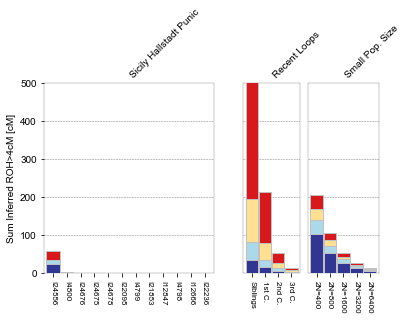

In [4]:
iids = ["I12666", "I12847", "I24678",
        "I24676",  "I24675",  "I24556",
        "I22095",  "I4798", "I4799", "I4800",
        "I7762", "I22236", "I21853"]

idx = df1["iid"].isin(iids)
df_t = df1[idx].copy()
print(f"Found {np.sum(idx)}/{len(iids)} Individuals")

df_t["clst"] = "Sicily Hallstadt Punic"

plot_dfs, cols = prepare_dfs_plot(df_t, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-2,
               figsize=(6, 3.5),
               ylim=[0, 500], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="")

Found 6/6 Individuals


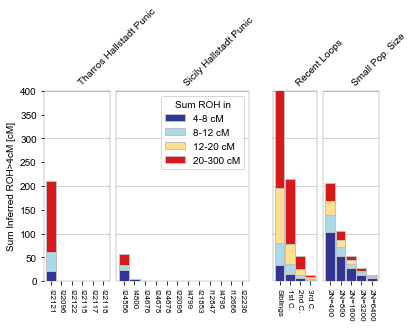

In [6]:
iids = ["I22115", "I22121", "I22096",
        "I22122", "I22118", "I22117"]

idx = df1["iid"].isin(iids)
df_t2 = df1[idx].copy()
print(f"Found {np.sum(idx)}/{len(iids)} Individuals")

df_t2["clst"] = "Tharros Hallstadt Punic"

df_a = pd.concat((df_t, df_t2))

plot_dfs, cols = prepare_dfs_plot(df_a, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(6, 3.5),
               ylim=[0, 400], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="")

# Malaga and Cadir

Found 5/5 Individuals


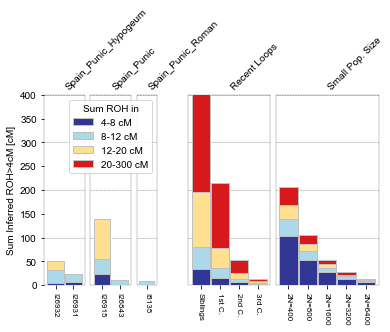

In [7]:
iids = ["I26843", "I26915", "I26931", "I26932", "I8135"]

idx = df1["iid"].isin(iids)
df_t2 = df1[idx].copy()
print(f"Found {np.sum(idx)}/{len(iids)} Individuals")
#df_a = pd.concat((df_t, df_t2))

plot_dfs, cols = prepare_dfs_plot(df_t2, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(6, 3.5),
               ylim=[0, 400], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="")

# Akzhiv

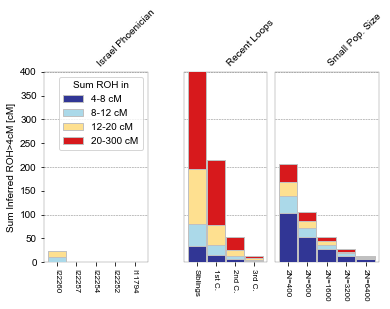

In [8]:
dft = df1[df1["clst"].str.contains("Israel_Phoen")].copy()
dft["clst"] = "Israel Phoenician"

plot_dfs, cols = prepare_dfs_plot(dft, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(6, 3.5),
               ylim=[0, 400], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="")

# Tunisia

Extracted 25/16201 Individuals


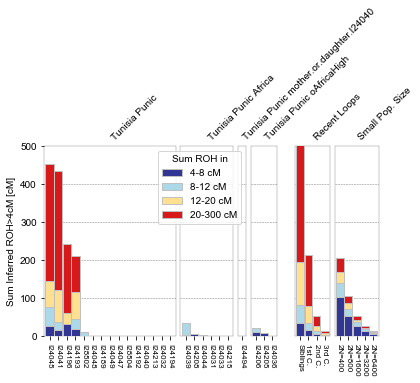

In [9]:
df_t = df1[df1["clst"].str.contains("Tunisia_Punic")].copy()
print(f"Extracted {len(df_t)}/{len(df1)} Individuals")

### Postprocess Population Labels
df_t["clst"] = df_t["clst"].str.replace("_", " ").copy()
#idx = df_t["clst"].str.contains("Italy Sicily LBA")
#df_t.loc[idx, "clst"]="Italy Sicily LBA"

plot_dfs, cols = prepare_dfs_plot(df_t, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-2,
               figsize=(6, 3.5),
               ylim=[0, 500], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="")

# All Punic

Extracted 91/16201 Individuals


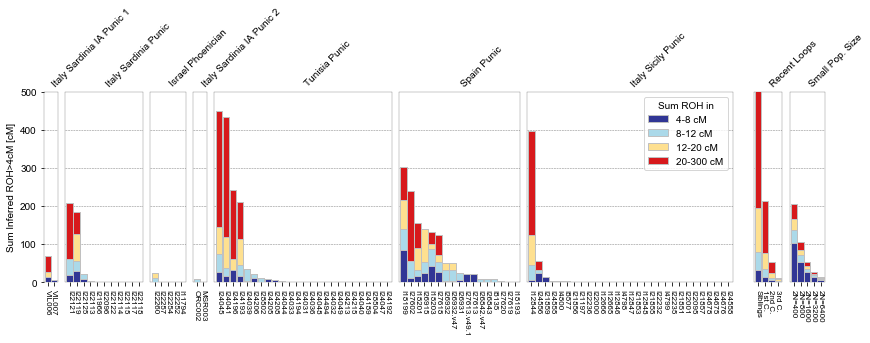

In [10]:
df_t = df1[df1["clst"].str.contains("Punic|Phoen")].copy()
print(f"Extracted {len(df_t)}/{len(df1)} Individuals")

### Postprocess Population Labels
df_t["clst"] = df_t["clst"].str.replace("_", " ").copy()

labels = ["Italy Sardinia Punic", "Italy Sicily Punic", "Spain Punic", "Tunisia Punic", "Israel Phoenician"]

for l in labels:
    idx = df_t["clst"].str.contains(l)
    #print(np.sum(idx))
    df_t.loc[idx, "clst"] = l

df_t["clst"] = df_t["clst"].str.replace("_", " ").copy()
#idx = df_t["clst"].str.contains("Italy Sicily LBA")
#df_t.loc[idx, "clst"]="Italy Sicily LBA"

plot_dfs, cols = prepare_dfs_plot(df_t, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(14, 3.5),
               ylim=[0, 500], hlines=[100,200, 300, 400],
               degrees=[0,1,2,3], ticks_c=["Siblings", '1st C.', '2nd C.', '3rd C.'],
               savepath="") # ./hapsburg_runs/figures/Punic.v46/kerkouane_ROH.pdf

Extracted 17/16201 Individuals


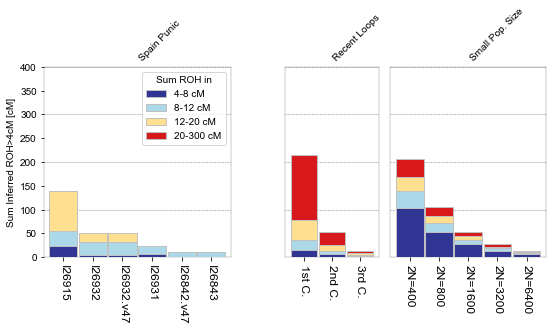

In [27]:
df_t = df1[df1["clst"].str.contains("Spain_Punic")].copy()
print(f"Extracted {len(df_t)}/{len(df1)} Individuals")

### Postprocess Population Labels
df_t["clst"] = df_t["clst"].str.replace("_", " ").copy()
#df_t = df_t[df_t["loc"].str.contains("Eivissa")]
df_t = df_t[df_t["loc"].str.contains("Málaga")]

labels = ["Spain Punic"]

for l in labels:
    idx = df_t["clst"].str.contains(l)
    #print(np.sum(idx))
    df_t.loc[idx, "clst"] = l

df_t["clst"] = df_t["clst"].str.replace("_", " ").copy()
#idx = df_t["clst"].str.contains("Italy Sicily LBA")
#df_t.loc[idx, "clst"]="Italy Sicily LBA"

plot_dfs, cols = prepare_dfs_plot(df_t, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-1,
               figsize=(9, 3.5), fs_x=12,
               ylim=[0, 400], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="") # ./hapsburg_runs/figures/Punic.v46/kerkouane_ROH.pdf

In [26]:
df_t["loc"].value_counts()

Almería, Cuevas del Almazora, Villaricos     4
Málaga, Hipgeo del Parking de Alcazabilla    3
Eivissa, Puig des Molins                     3
Málaga, Calle Mármoles                       3
Eivissa, Ses Païsses de Cala d'Hort          2
Cádiz, San Fernando, Campo de Hockey         1
Eivissa, Can Marines                         1
Name: loc, dtype: int64

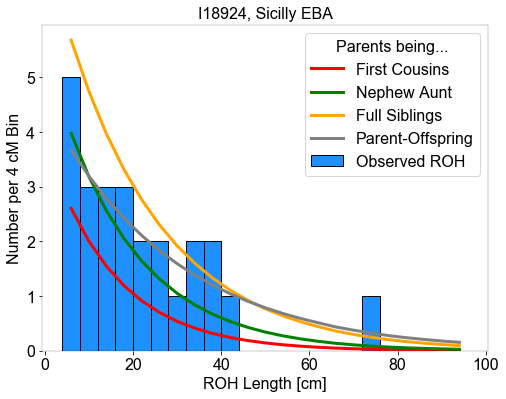

In [21]:
plot_pde_individual(iid="I18924", folder='./hapsburg_runs/output/v43_full/', 
                    prefix_out='', title="I18924, Sicilly EBA",
                    ms=[6, 5, 4, 3],  comm_ancs=[4, 4, 4, 2],
                    labels=['First Cousins', "Nephew Aunt", "Full Siblings", "Parent-Offspring"],
                    savepath="") # ./hapsburg_runs/dumpster/for_alissa/curves_HIM001.png

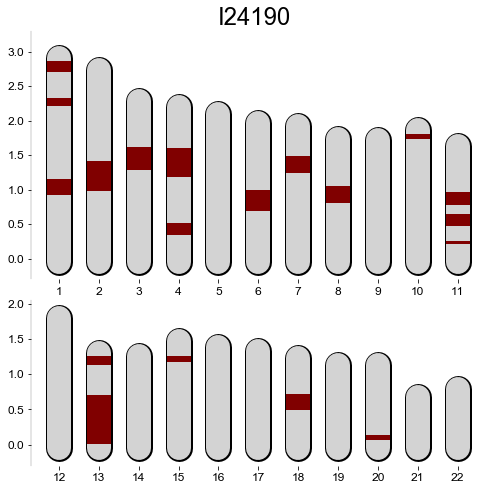

In [47]:
plot_roh_individual(iid="I24190", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  #

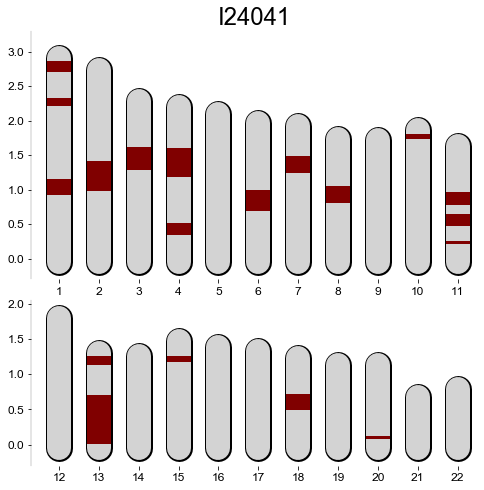

In [42]:
plot_roh_individual(iid="I24041", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # ./hapsburg_runs/figures/v46/I24367_karyo.pdf

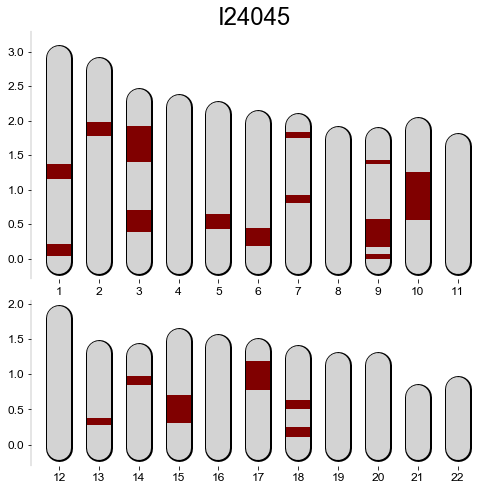

In [45]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

In [ ]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

Successfully loaded Data from: ./hapsburg_runs/output/v43_full/HIM001.SG/chr17/


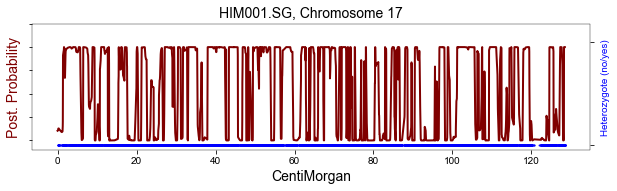

In [4]:
plot_posterior_cm(folder = "./hapsburg_runs/output/v43_full/HIM001.SG/chr17/", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="HIM001.SG, Chromosome 17",
                  savepath=""
                  )

# 